### The notebook started with
1) Importing the libraries
2) Dataset visualization before and after cleaning the dataset
3) Training a VisionTransformer (ViT) on the dataset
4) Attempted to design a custom CNN classification model
5) CNN layer visualization for fine tuning the model
6) Additional technique that can increase the accuracy of tclassifying the brand in an image

# Importing required libraries

In [1]:
import cv2
import os
import random
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from keras import models
from tensorflow.keras import layers
import tensorflow_addons as tfa
import seaborn as sns
import pandas as pd


2023-04-19 19:52:44.662297: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-19 19:52:44.778782: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-04-19 19:52:45.239330: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/rukon/anaconda3/envs/vent/lib/python3.9/site-packages/cv2/../../lib64:/usr/local/cuda-11.7/lib64:
2023-04-19 19:52:45.239385: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load d

# Data Visualization before cleaning

In [2]:
train_adidas = [[f"technical_test_venturas2/dataset/train/adidas/{i}", "Adidas"] for i in os.listdir("technical_test_venturas2/dataset/train/adidas")]
train_nike = [[f"technical_test_venturas2/dataset/train/nike/{i}", "Nike"] for i in os.listdir("technical_test_venturas2/dataset/train/nike")]

val_adidas = [[f"technical_test_venturas2/dataset/validation/adidas/{i}", "Adidas"] for i in os.listdir("technical_test_venturas2/dataset/validation/adidas")]
val_nike = [[f"technical_test_venturas2/dataset/validation/nike/{i}", "Nike"] for i in os.listdir("technical_test_venturas2/dataset/validation/nike")]

test_adidas = [[f"technical_test_venturas2/dataset/test/adidas/{i}", "Adidas"] for i in os.listdir("technical_test_venturas2/dataset/test/adidas")]
test_nike = [[f"technical_test_venturas2/dataset/test/nike/{i}", "Nike"] for i in os.listdir("technical_test_venturas2/dataset/test/nike")]

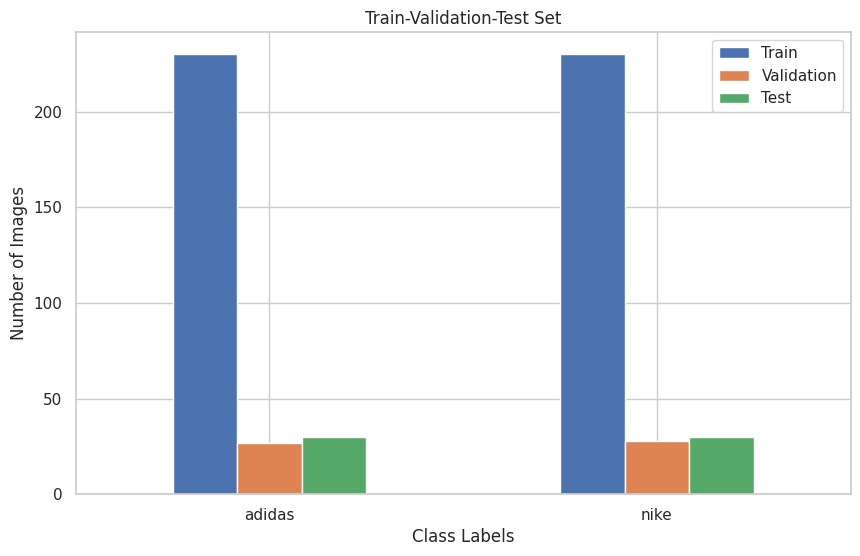

In [3]:
data_dir = "technical_test_venturas2/dataset"
class_labels = sorted(os.listdir(data_dir + "/train"))

train_count = []
val_count = []
test_count = []
for label in class_labels:
    train_images = len(os.listdir(data_dir + "/train/" + label))
    val_images = len(os.listdir(data_dir + "/validation/" + label))
    test_images = len(os.listdir(data_dir + "/test/" + label))
    train_count.append(train_images)
    val_count.append(val_images)
    test_count.append(test_images)

data = {"Train": train_count, "Validation": val_count, "Test": test_count}
df = pd.DataFrame(data=data, index=class_labels)

sns.set(style="whitegrid")
ax = df.plot(kind="bar", figsize=(10,6), rot=0)
ax.set_xlabel('Class Labels')
ax.set_ylabel('Number of Images')
ax.set_title('Train-Validation-Test Set')
plt.show()

# Data Visualization after cleaning

In [4]:
train_adidas = [[f"technical_test_venturas/dataset/train/adidas/{i}", "Adidas"] for i in os.listdir("technical_test_venturas/dataset/train/adidas")]
train_nike = [[f"technical_test_venturas/dataset/train/nike/{i}", "Nike"] for i in os.listdir("technical_test_venturas/dataset/train/nike")]

val_adidas = [[f"technical_test_venturas/dataset/validation/adidas/{i}", "Adidas"] for i in os.listdir("technical_test_venturas/dataset/validation/adidas")]
val_nike = [[f"technical_test_venturas/dataset/validation/nike/{i}", "Nike"] for i in os.listdir("technical_test_venturas/dataset/validation/nike")]

test_adidas = [[f"technical_test_venturas/dataset/test/adidas/{i}", "Adidas"] for i in os.listdir("technical_test_venturas/dataset/test/adidas")]
test_nike = [[f"technical_test_venturas/dataset/test/nike/{i}", "Nike"] for i in os.listdir("technical_test_venturas/dataset/test/nike")]

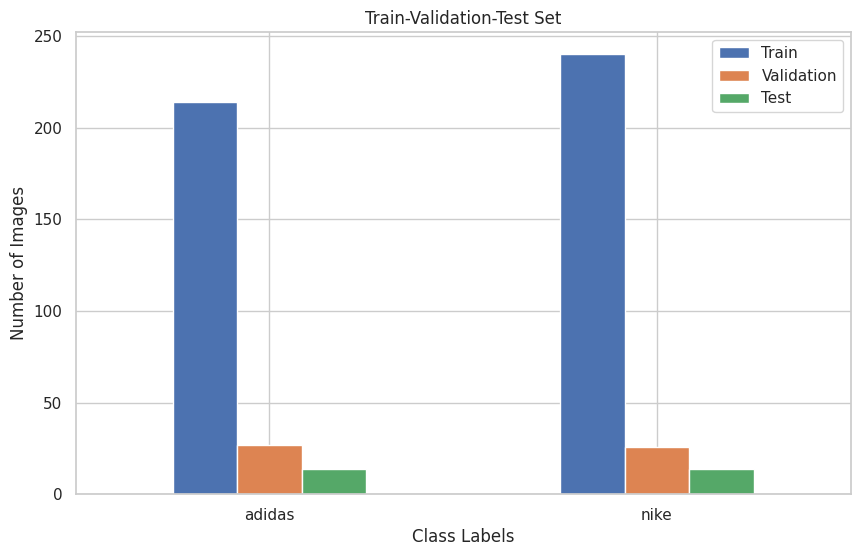

In [5]:
data_dir = "technical_test_venturas/dataset"
class_labels = sorted(os.listdir(data_dir + "/train"))

train_count = []
val_count = []
test_count = []
for label in class_labels:
    train_images = len(os.listdir(data_dir + "/train/" + label))
    val_images = len(os.listdir(data_dir + "/validation/" + label))
    test_images = len(os.listdir(data_dir + "/test/" + label))
    train_count.append(train_images)
    val_count.append(val_images)
    test_count.append(test_images)

data = {"Train": train_count, "Validation": val_count, "Test": test_count}
df = pd.DataFrame(data=data, index=class_labels)

sns.set(style="whitegrid")
ax = df.plot(kind="bar", figsize=(10,6), rot=0)
ax.set_xlabel('Class Labels')
ax.set_ylabel('Number of Images')
ax.set_title('Train-Validation-Test Set')
plt.show()

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


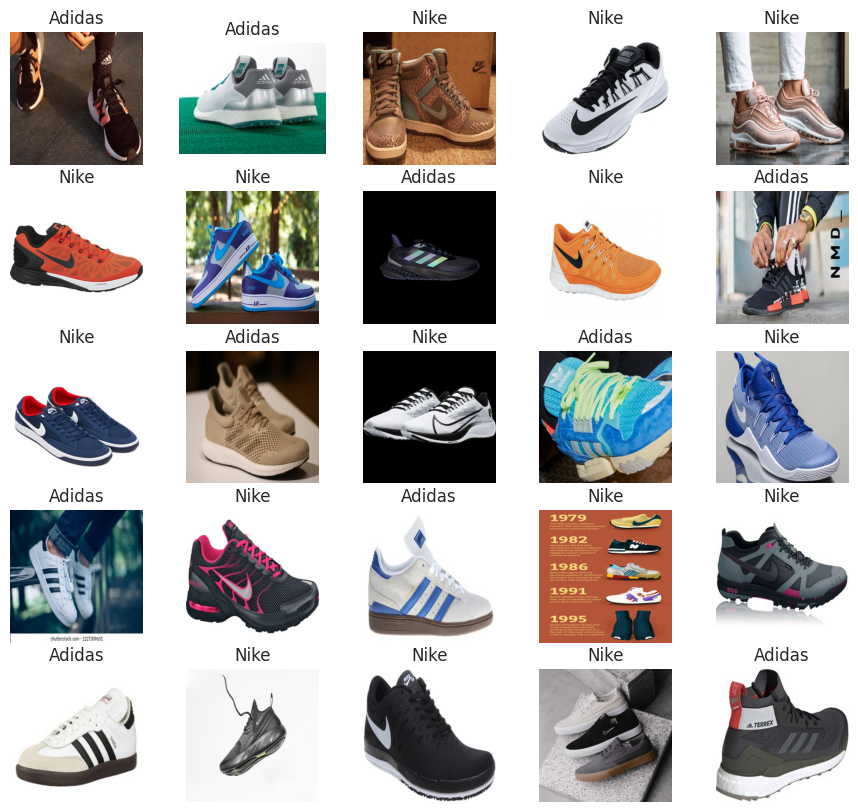

In [6]:
fig = plt.figure(figsize=(11, 10))
train = train_adidas + train_nike
rows = 5
columns = 5
img_path = random.sample(train, rows*columns)
for co, c in enumerate(img_path):
    img = cv2.imread(c[0])
    fig.add_subplot(rows, columns, co+1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(c[1])

# Vision Transformer (ViT)

In [7]:
def preprocess(img):
    img = cv2.resize(img, (150, 150))
    return img

def prepare_dataset(img_dir):
    X = []
    y = []
    for img_p in os.listdir(img_dir):
        label = img_p.split("_")[0]
        img = cv2.imread(f"{img_dir}/{img_p}")
        # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = preprocess(img)
        # img = img / 255.
        X.append(img)
        if label == "adidas":
            y.append(0)
        else:
            y.append(1)
    return (np.array(X), np.array(y))

In [8]:
num_classes = 2
input_shape = (150, 150, 3)

x_train, y_train = prepare_dataset("technical_test_venturas/ViT/train/")
x_val, y_val = prepare_dataset("technical_test_venturas/ViT/val/")
x_test, y_test = prepare_dataset("technical_test_venturas/ViT/test/")

class_dict = {0: "adidas", 1: "nike"}

print(f"x_train shape: {x_train.shape} - y_train shape: {y_train.shape}")
print(f"x_val shape: {x_val.shape} - y_val shape: {y_val.shape}")
print(f"x_test shape: {x_test.shape} - y_test shape: {y_test.shape}")

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


x_train shape: (454, 150, 150, 3) - y_train shape: (454,)
x_val shape: (53, 150, 150, 3) - y_val shape: (53,)
x_test shape: (28, 150, 150, 3) - y_test shape: (28,)


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


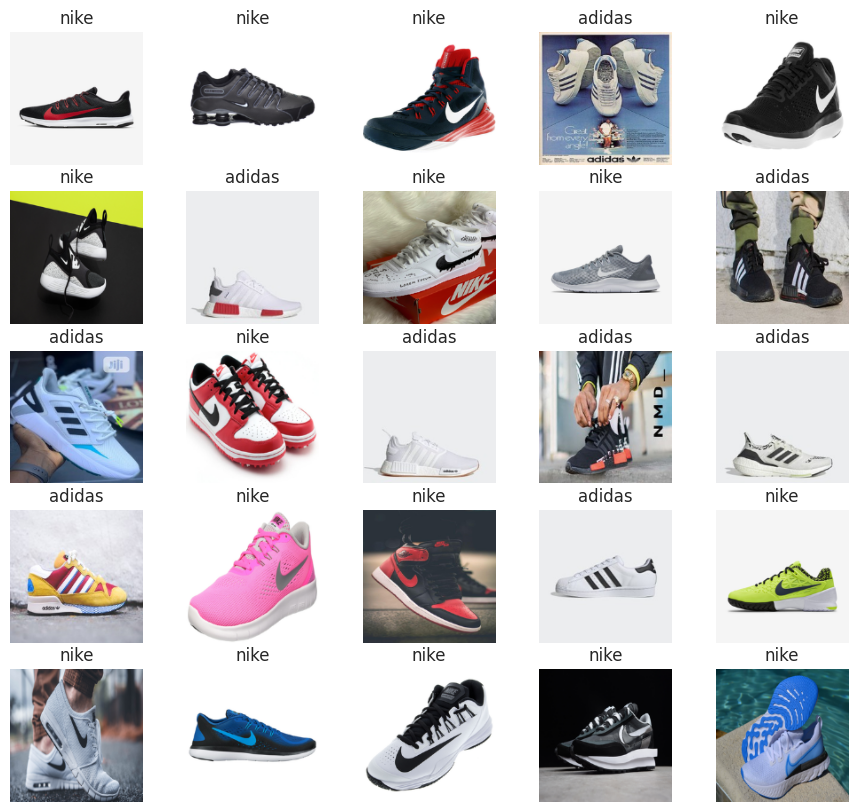

In [9]:
# create figure
fig = plt.figure(figsize=(11, 10))
# setting values to rows and column variables
rows = 5
columns = 5
# img_path = random.sample(train, rows*columns)
for co, c in enumerate(x_train):
    # img = cv2.imread(c)
    if co >= 25:
        break
    fig.add_subplot(rows, columns, co+1)
    plt.imshow(cv2.cvtColor(c, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(class_dict[y_train[co]])

In [10]:
learning_rate = 0.001
weight_decay = 0.0001
batch_size = 8
num_epochs = 80
image_size = 72  # We'll resize input images to this size
patch_size = 6  # Size of the patches to be extract from the input images
num_patches = (image_size // patch_size) ** 2
projection_dim = 64
num_heads = 4
transformer_units = [
    projection_dim * 2,
    projection_dim,
]  # Size of the transformer layers
transformer_layers = 8
mlp_head_units = [2048, 1024]

In [11]:
data_augmentation = keras.Sequential(
    [
        layers.Normalization(),
        layers.Resizing(image_size, image_size),
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(factor=0.02),
        layers.RandomZoom(
            height_factor=0.2, width_factor=0.2
        ),
    ],
    name="data_augmentation",
)
# Compute the mean and the variance of the training data for normalization.
data_augmentation.layers[0].adapt(x_train)

2023-04-19 19:52:57.931729: E tensorflow/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: CUDA_ERROR_SYSTEM_DRIVER_MISMATCH: system has unsupported display driver / cuda driver combination
2023-04-19 19:52:57.931766: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: rukon-MS-7C84
2023-04-19 19:52:57.931772: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: rukon-MS-7C84
2023-04-19 19:52:57.931979: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 510.108.3
2023-04-19 19:52:57.932001: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 515.105.1
2023-04-19 19:52:57.932007: E tensorflow/stream_executor/cuda/cuda_diagnostics.cc:313] kernel version 515.105.1 does not match DSO version 510.108.3 -- cannot find working devices in this configuration
2023-04-19 19:52:57.932376: I tensorflow/core/platform/cpu_feature_guard.cc:193] T

In [12]:
def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = layers.Dense(units, activation=tf.nn.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x

In [13]:
class Patches(layers.Layer):
    def __init__(self, patch_size):
        super().__init__()
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding="VALID",
        )
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches

Image size: 72 X 72
Patch size: 6 X 6
Patches per image: 144
Elements per patch: 108


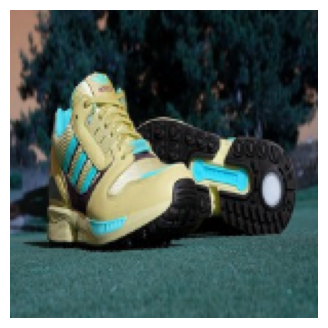

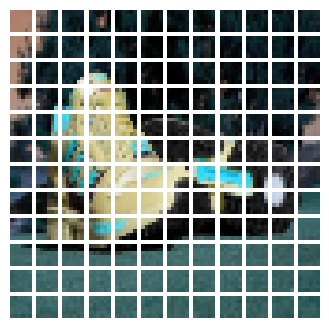

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 4))
image = x_train[np.random.choice(range(x_train.shape[0]))]
plt.imshow(image.astype("uint8"))
plt.axis("off")

resized_image = tf.image.resize(
    tf.convert_to_tensor([image]), size=(image_size, image_size)
)
patches = Patches(patch_size)(resized_image)
print(f"Image size: {image_size} X {image_size}")
print(f"Patch size: {patch_size} X {patch_size}")
print(f"Patches per image: {patches.shape[1]}")
print(f"Elements per patch: {patches.shape[-1]}")

n = int(np.sqrt(patches.shape[1]))
plt.figure(figsize=(4, 4))
for i, patch in enumerate(patches[0]):
    ax = plt.subplot(n, n, i + 1)
    patch_img = tf.reshape(patch, (patch_size, patch_size, 3))
    plt.imshow(patch_img.numpy().astype("uint8"))
    plt.axis("off")

In [16]:
class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super().__init__()
        self.num_patches = num_patches
        self.projection = layers.Dense(units=projection_dim)
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )

    def call(self, patch):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        encoded = self.projection(patch) + self.position_embedding(positions)
        return encoded

In [17]:
def create_vit_classifier():
    inputs = layers.Input(shape=input_shape)
    augmented = data_augmentation(inputs)
    patches = Patches(patch_size)(augmented)
    encoded_patches = PatchEncoder(num_patches, projection_dim)(patches)

    for _ in range(transformer_layers):
        # Layer normalization 1.
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        attention_output = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=projection_dim, dropout=0.1
        )(x1, x1)
        # Skip connection 1.
        x2 = layers.Add()([attention_output, encoded_patches])
        # Layer normalization 2.
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        # MLP.
        x3 = mlp(x3, hidden_units=transformer_units, dropout_rate=0.1)
        # Skip connection 2.
        encoded_patches = layers.Add()([x3, x2])

    # Create a [batch_size, projection_dim] tensor.
    representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    representation = layers.Flatten()(representation)
    representation = layers.Dropout(0.5)(representation)
    # Add MLP.
    features = mlp(representation, hidden_units=mlp_head_units, dropout_rate=0.5)
    # Classify outputs.
    logits = layers.Dense(num_classes)(features)
    # Create the Keras model.
    model = keras.Model(inputs=inputs, outputs=logits)
    return model

In [19]:
def run_experiment(model):
    optimizer = tfa.optimizers.AdamW(
        learning_rate=learning_rate, weight_decay=weight_decay
    )

    model.compile(
        optimizer=optimizer,
        loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=[
            keras.metrics.SparseCategoricalAccuracy(name="accuracy"),
            keras.metrics.SparseTopKCategoricalAccuracy(5, name="top-5-accuracy"),
        ],
    )

    model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath="vit_model/ViT_model.hdf5", 
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    verbose = 1)


    history = model.fit(
        x=x_train,
        y=y_train,
        batch_size=batch_size,
        validation_data = (x_val, y_val),
        epochs=num_epochs,
        callbacks=[model_checkpoint_callback],
    )

    # model.load_weights(checkpoint_filepath)
    _, accuracy, top_5_accuracy = model.evaluate(x_test, y_test)
    print(f"Test accuracy: {round(accuracy * 100, 2)}%")
    print(f"Test top 5 accuracy: {round(top_5_accuracy * 100, 2)}%")

    return model, history


vit_classifier = create_vit_classifier()
model, history = run_experiment(vit_classifier)

Epoch 1/80
57/57 [==============================] - ETA: 0s - loss: 6.7443 - accuracy: 0.5352 - top-5-accuracy: 1.0000
Epoch 1: val_loss improved from inf to 5.07816, saving model to vit_model/ViT_model.hdf5
57/57 [==============================] - 22s 252ms/step - loss: 6.7443 - accuracy: 0.5352 - top-5-accuracy: 1.0000 - val_loss: 5.0782 - val_accuracy: 0.5472 - val_top-5-accuracy: 1.0000
Epoch 2/80
57/57 [==============================] - ETA: 0s - loss: 4.2209 - accuracy: 0.6057 - top-5-accuracy: 1.0000
Epoch 2: val_loss improved from 5.07816 to 1.42819, saving model to vit_model/ViT_model.hdf5
57/57 [==============================] - 14s 239ms/step - loss: 4.2209 - accuracy: 0.6057 - top-5-accuracy: 1.0000 - val_loss: 1.4282 - val_accuracy: 0.6226 - val_top-5-accuracy: 1.0000
Epoch 3/80
57/57 [==============================] - ETA: 0s - loss: 3.1758 - accuracy: 0.5793 - top-5-accuracy: 1.0000
Epoch 3: val_loss did not improve from 1.42819
57/57 [==============================] - 1

# Prediction results of the Vistion Transformer (ViT) model
Act - Actual (Ground truth)

Pred - Predicted result

In [20]:
test_data = []
for test in os.listdir("technical_test_venturas/ViT/test"):
    label = test.split("_")[0]
    temp_str = f"technical_test_venturas/ViT/test/{test}"
    test_data.append([temp_str, label])
    
random.shuffle(test_data)

1/1 [==============================] - 0s 28ms/step


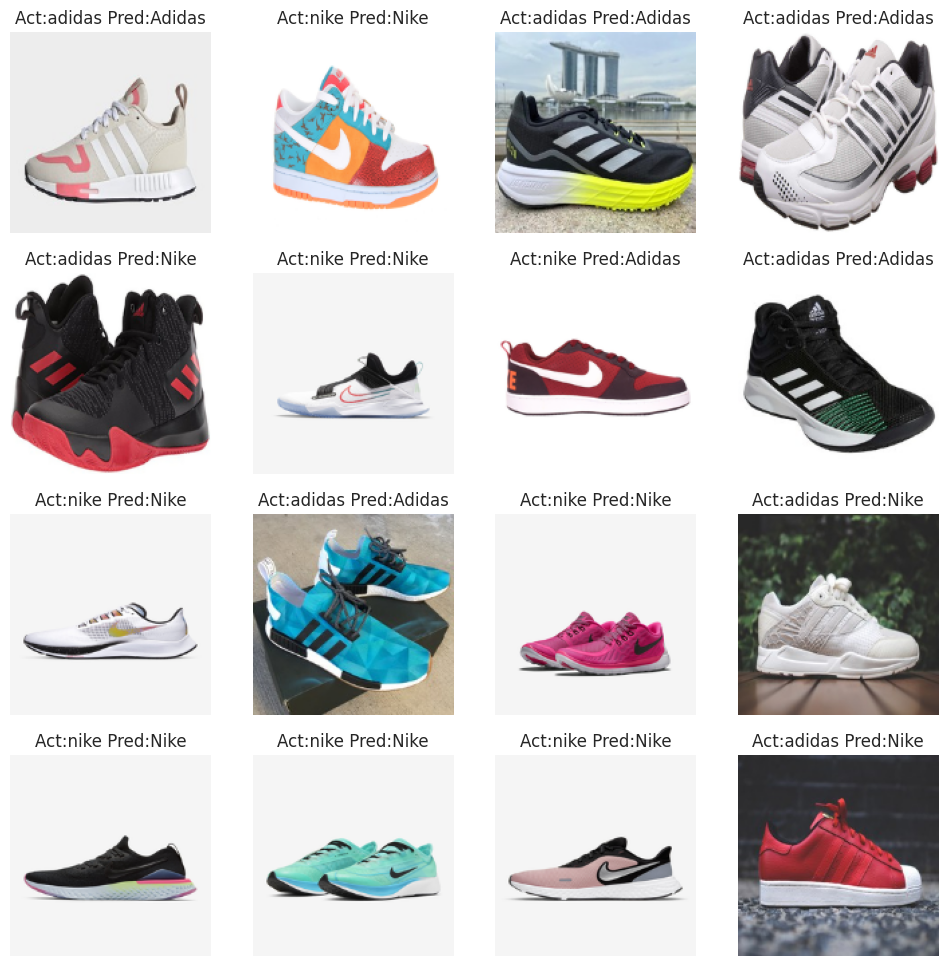

In [21]:
fig = plt.figure(figsize=(12, 12)) 
rows = 4
columns = 4
img_path = random.sample(test_data, rows*columns)
for co, c in enumerate(img_path):
    img = cv2.imread(c[0])
    img = cv2.resize(img, (150, 150))
    img = np.expand_dims(img, axis=0)
    pred = np.argmax(model.predict(img))
    # pred = model.predict(img)
    # pred = pred[0,0]
    pred_string = ""
    if pred == 0:
        pred_string = "Adidas"
    else:
        pred_string = "Nike"

    fig.add_subplot(rows, columns, co+1)
    plt.imshow(cv2.cvtColor(img[0], cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(f"Act:{c[1]} Pred:{pred_string}")

# Training a custom model using tensorflow ImageDataGenerator

In [22]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

In [23]:
train_set = train_datagen.flow_from_directory(
        'technical_test_venturas/dataset/train/',
        target_size=(200, 200),
        batch_size=4,
        class_mode='binary')

Found 454 images belonging to 2 classes.


In [24]:
val_datagen = ImageDataGenerator(rescale=1./255)

In [25]:
val_set = val_datagen.flow_from_directory(
        'technical_test_venturas/dataset/validation',
        target_size=(200, 200),
        batch_size=4,
        class_mode='binary')

Found 53 images belonging to 2 classes.


In [26]:
train_set.class_indices

{'adidas': 0, 'nike': 1}

In [27]:
input = keras.Input(shape=(200, 200, 3))
x = layers.Conv2D(32, (3,3), activation = "relu")(input)
x = layers.MaxPool2D(2, 2)(x)
x = layers.Conv2D(64, (3,3),  activation = "relu")(x)
x = layers.MaxPool2D(2, 2)(x)
# x = layers.Dropout(0.2)(x)
x = layers.Conv2D(64, (3,3),  activation = "relu")(x)
x = layers.MaxPool2D(2, 2)(x)
x = layers.Conv2D(128, (3,3),  activation = "relu")(x)
# x = layers.Dropout(0.2)(x)
x = layers.MaxPool2D(2, 2)(x)
x = layers.Conv2D(256, (3,3),  activation = "relu")(x)
# x = layers.Dropout(0.4)(x)
x = layers.MaxPool2D(2, 2)(x)
x = layers.Flatten()(x)
x = layers.Dense(128,  activation = "relu")(x)
outputs = layers.Dense(1, activation = "sigmoid")(x)

In [28]:
model = keras.Model(inputs = input, outputs = outputs)

In [29]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 64)        3692

In [30]:
model.compile(optimizer="adam", loss = "binary_crossentropy", metrics=['accuracy'])

In [31]:
model.fit(x = train_set, validation_data=val_set, epochs=50)

Epoch 1/50
 61/114 [===============>..............] - ETA: 3s - loss: 0.6972 - accuracy: 0.4918

/home/rukon/anaconda3/envs/vent/lib/python3.9/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


114/114 [==============================] - 8s 67ms/step - loss: 0.6943 - accuracy: 0.5176 - val_loss: 0.6880 - val_accuracy: 0.4906
Epoch 2/50
114/114 [==============================] - 7s 62ms/step - loss: 0.6859 - accuracy: 0.5286 - val_loss: 0.6785 - val_accuracy: 0.5283
Epoch 3/50
114/114 [==============================] - 7s 62ms/step - loss: 0.7017 - accuracy: 0.4956 - val_loss: 0.6891 - val_accuracy: 0.4906
Epoch 4/50
114/114 [==============================] - 7s 62ms/step - loss: 0.6781 - accuracy: 0.5991 - val_loss: 0.7607 - val_accuracy: 0.5283
Epoch 5/50
114/114 [==============================] - 7s 61ms/step - loss: 0.6567 - accuracy: 0.6189 - val_loss: 0.6710 - val_accuracy: 0.6226
Epoch 6/50
114/114 [==============================] - 7s 62ms/step - loss: 0.6312 - accuracy: 0.6410 - val_loss: 0.6297 - val_accuracy: 0.6226
Epoch 7/50
114/114 [==============================] - 7s 62ms/step - loss: 0.6177 - accuracy: 0.6542 - val_loss: 0.6324 - val_accuracy: 0.6415
Epoch 8/50

# Layer visualization

This is helpful to make more robust model

(1, 200, 200, 3)


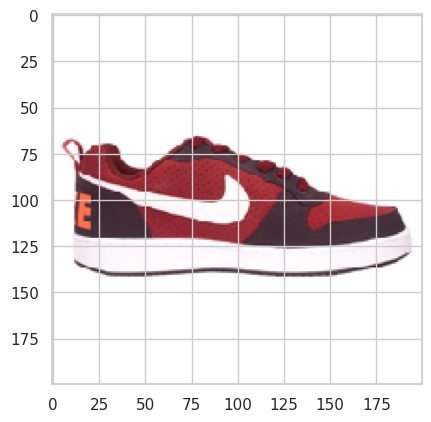

In [38]:
img_path = 'technical_test_venturas/dataset/test/nike/nike_19.jpg'
import keras.utils as image
import numpy as np
img = image.load_img(img_path, target_size=(200, 200))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
print(img_tensor.shape)
plt.imshow(img_tensor[0])
plt.show()

In [39]:
layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

In [40]:
activations = activation_model.predict(img_tensor)
first_layer_activation = activations[0]
print(first_layer_activation.shape)

1/1 [==============================] - 0s 56ms/step
(1, 200, 200, 3)


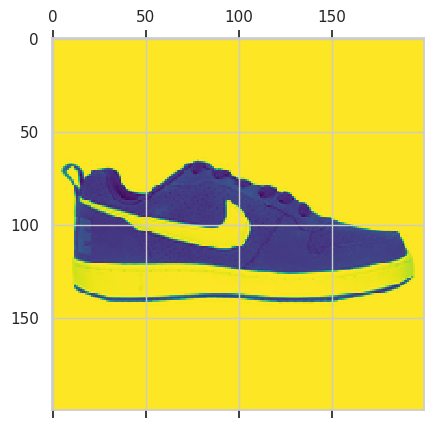

In [41]:
plt.matshow(first_layer_activation[0, :, :, 2], cmap='viridis')

/tmp/ipykernel_1175162/586792366.py:27: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.imshow(display_grid, aspect='auto', cmap='viridis')
/tmp/ipykernel_1175162/586792366.py:17: RuntimeWarning: invalid value encountered in divide
  channel_image /= channel_image.std()
/tmp/ipykernel_1175162/586792366.py:20: RuntimeWarning: invalid value encountered in cast
  channel_image = np.clip(channel_image, 0, 255).astype('uint8')
/home/rukon/anaconda3/envs/vent/lib/python3.9/site-packages/matplotlib/_tight_bbox.py:64: RuntimeWarning: divide by zero encountered in scalar divide
  fig.patch.set_bounds(x0 / w1, y0 / h1,
/home/rukon/anaconda3/envs/vent/lib/python3.9/site-packages/matplotlib/_tight_bbox.py:65: RuntimeWarning: divide by zero encountered in scalar divide
  fig.bbox.width / w1, fig.bbox.height / h1)
/home/rukon/anaconda3/envs/vent/lib/python3.9/site-packages/matplotlib/patches.py:739: RuntimeWarning: invalid val

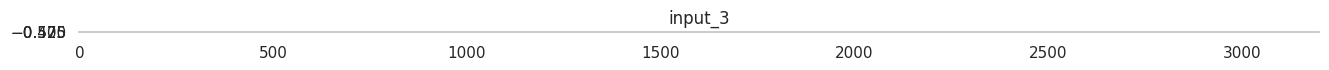

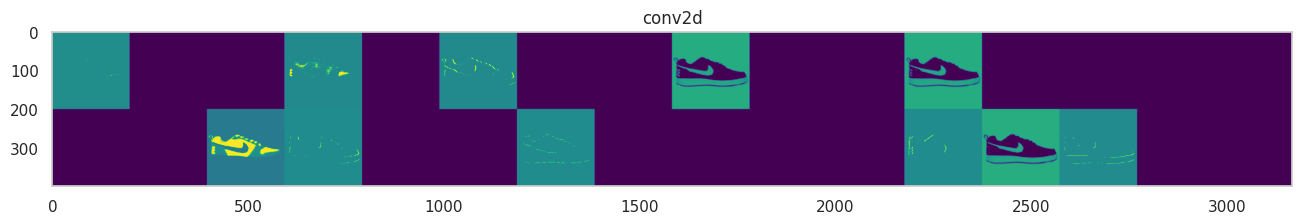

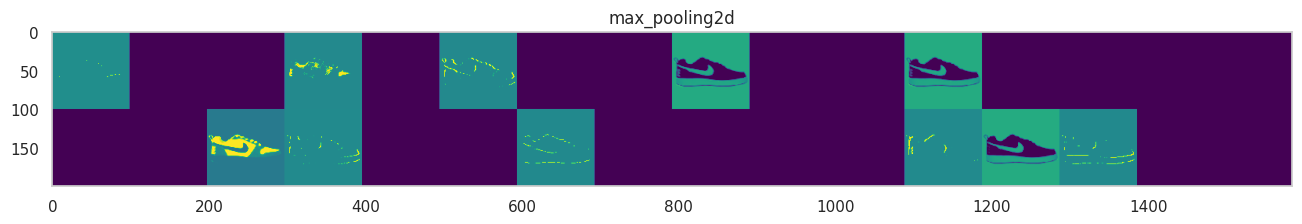

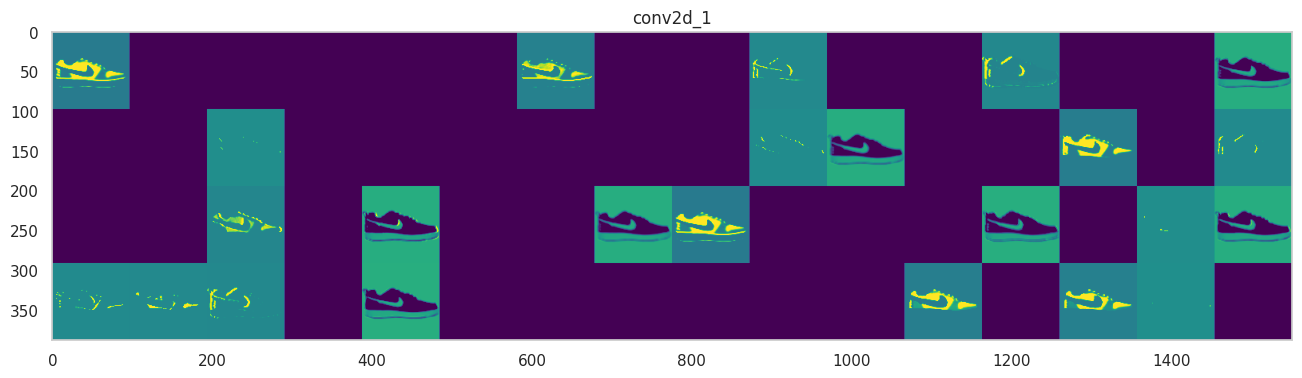

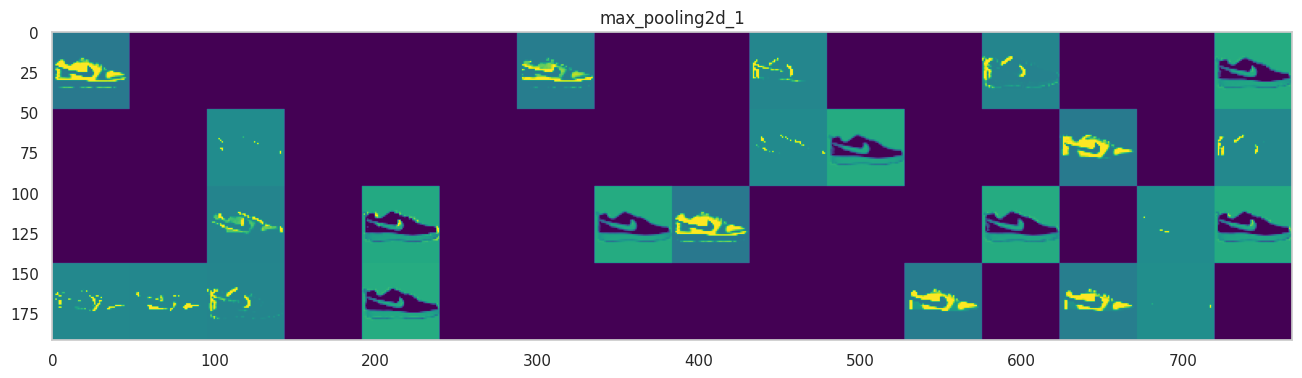

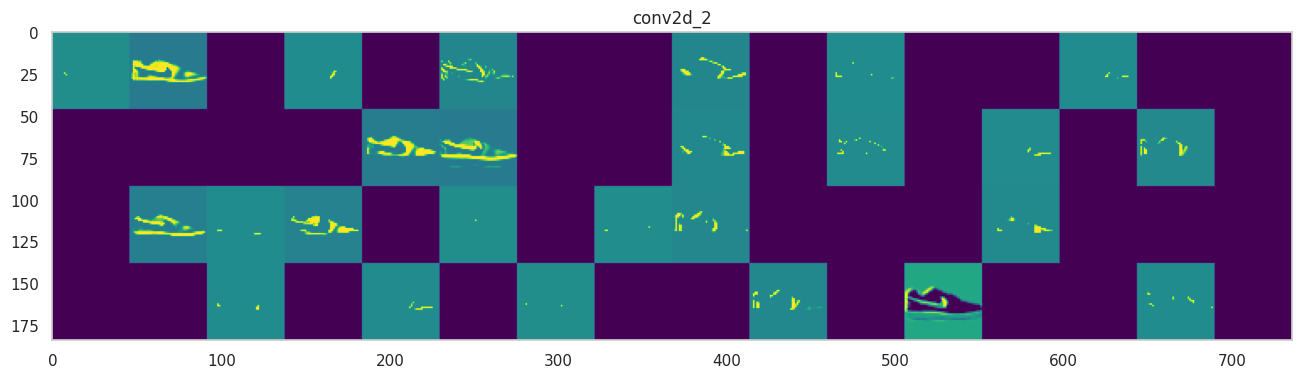

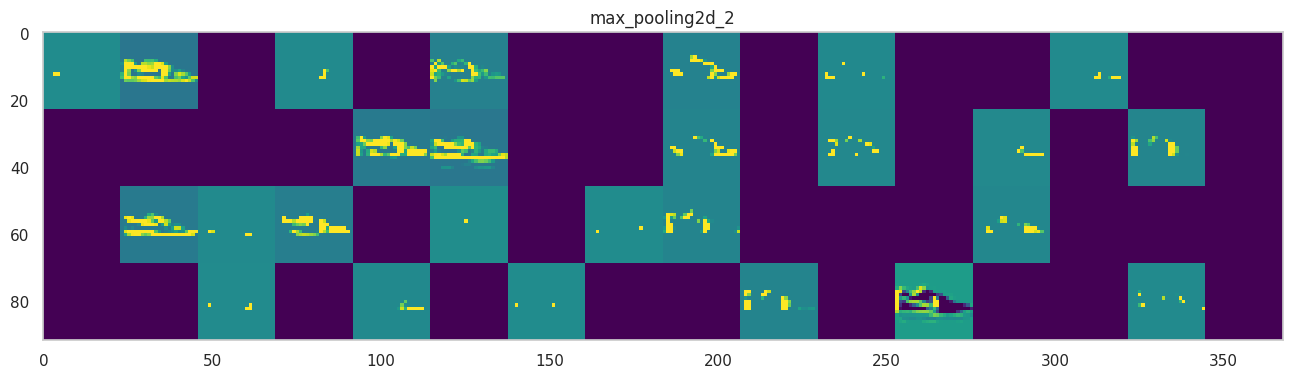

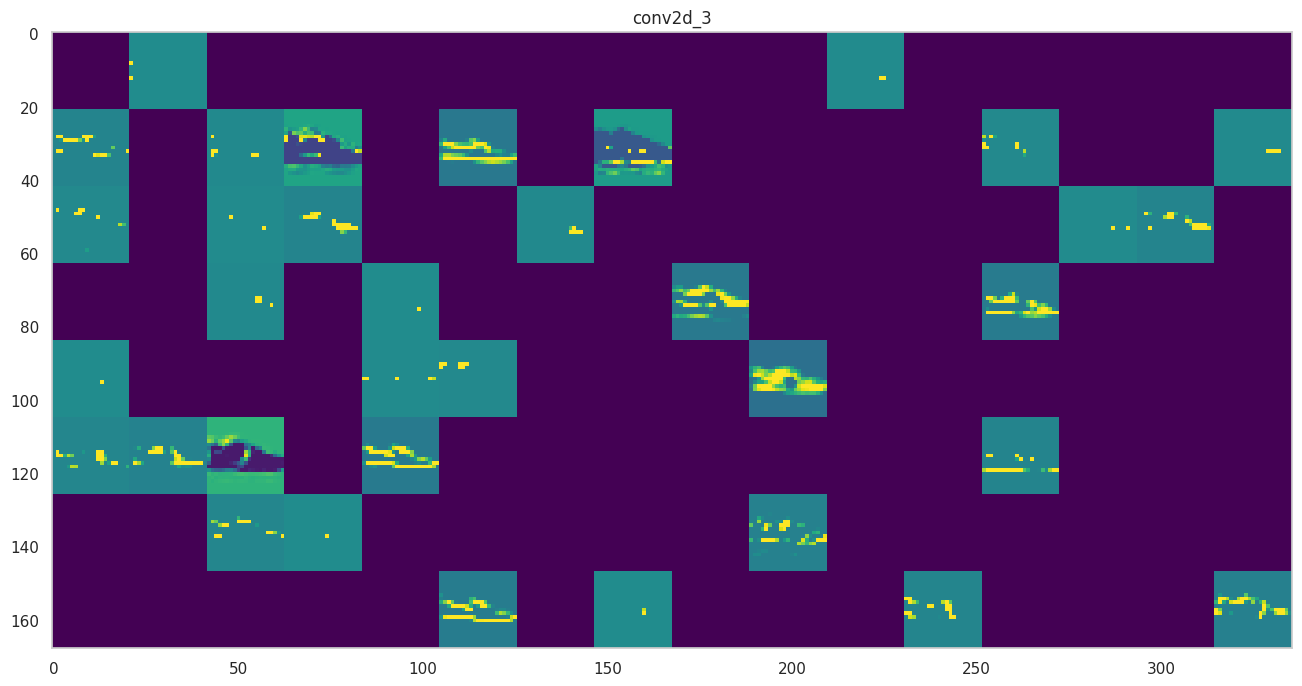

In [42]:
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)
    
images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1]
    size = layer_activation.shape[1]
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
            :, :,
            col * images_per_row + row]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
    scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

# Prediction results of the custom model
Act - Actual (Ground truth)

Pred - Predicted result

In [43]:
import os
test_adidas = [[f"technical_test_venturas/dataset/test/adidas/{i}", "Adidas"] for i in os.listdir("technical_test_venturas/dataset/test/adidas")]
test_nike = [[f"technical_test_venturas/dataset/test/nike/{i}", "Nike"] for i in os.listdir("technical_test_venturas/dataset/test/nike")]
test_data = test_adidas + test_nike
random.shuffle(test_data)

1/1 [==============================] - 0s 16ms/step


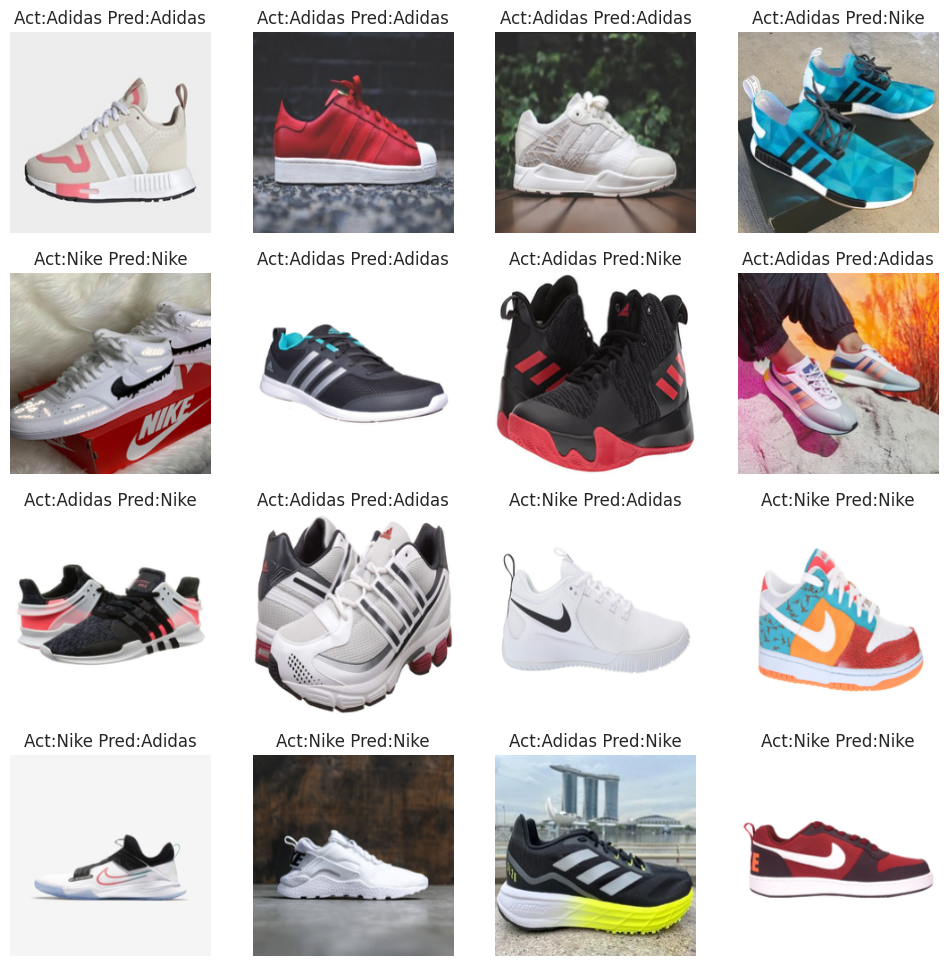

In [44]:
# img = cv2.imread(val[15][0])
# img = cv2.resize(img, (500, 500))
# img = np.expand_dims(img, axis=0)
# print(model.predict(img))
# plt.imshow(cv2.cvtColor(img[0], cv2.COLOR_BGR2RGB))



# create figure
fig = plt.figure(figsize=(12, 12)) 
rows = 4
columns = 4
img_path = random.sample(test_data, rows*columns)
for co, c in enumerate(img_path):
    img = cv2.imread(c[0])
    img = cv2.resize(img, (200, 200))
    img = np.expand_dims(img, axis=0)
    pred = model.predict(img)
    pred = pred[0,0]
    pred_string = ""
    if pred < 0.5:
        pred_string = "Adidas"
    else:
        pred_string = "Nike"

    fig.add_subplot(rows, columns, co+1)
    plt.imshow(cv2.cvtColor(img[0], cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(f"Act:{c[1]} Pred:{pred_string}")

# Additional Techniques

1) Transfer learning
    -  Transfer learning is a technique which uses pre-trained weights of a model to help the new model quickly converge to the global minima. Some famous classification models are VGG19, LeNet, MobileNet, etc.
2) Logo detection
    - Instead of classifying image of shoes, detecting the logo in an Image will give very accurate result. This will require to annotate the logos manually, which is very time consuming.